<div class="alert alert-block alert-danger">
    
<b>SHOOTING SUCCESS RATES BY POSITION</b>
    
</div>

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy

import warnings;
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Euroleague 2020-2021.xlsx")
df

,Player,Club,Number,Position,Nation,Age,Height,Games,Min,Pts,...,Blocks(Fv),Blocks(Fv)_avg,Blocks(Ag),Blocks(Ag)_avg,Fouls(Cm),Fouls(Cm)_avg,Fouls(Rv),Fouls(Rv)_avg,PIR,PIR_avg
0,"Abalde, Alberto",Real Madrid,6,Forward,Spain,25,202,39,761,281,...,0,0.00,6,0.15,60,1.54,57,1.46,325,8.33
1,"Abrines, Alex",FC Barcelona,21,Forward,Spain,27,198,39,730,237,...,8,0.21,7,0.18,96,2.46,39,1.00,182,4.67
2,"Alocen, Carlos",Real Madrid,12,Guard,Spain,20,194,28,376,110,...,2,0.07,4,0.14,46,1.64,31,1.11,93,3.32
3,"Amaize, Robin",FC Bayern Munich,15,Forward,Germany,26,188,9,51,4,...,0,0.00,1,0.11,6,0.67,2,0.22,-1,-0.11
4,"Anderson, James",Anadolu Efes,23,Forward,USA,31,198,41,622,172,...,6,0.15,3,0.07,55,1.34,39,0.95,234,5.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,3,Guard,Russian Federation,27,192,17,82,15,...,1,0.06,0,0.00,20,1.18,12,0.71,6,0.35
290,"Zipser, Paul",FC Bayern Munich,16,Forward,Germany,26,203,39,858,356,...,10,0.26,5,0.13,86,2.21,74,1.90,371,9.51
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,23,Center,Croatia,23,210,34,676,309,...,26,0.76,17,0.50,56,1.65,58,1.71,386,11.35
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,50,Guard,Poland,22,200,11,150,29,...,0,0.00,1,0.09,22,2.00,7,0.64,18,1.64


In [3]:
df[['2FG', '3FG', 'FT']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2FG     294 non-null    object
 1   3FG     294 non-null    object
 2   FT      294 non-null    object
dtypes: object(3)
memory usage: 7.0+ KB


### splitting the related columns, converting into an integer type, adding new columns

In [4]:
df[['2FG_Shots', '2FG_Attempts']] = df['2FG'].str.split('/', expand=True).astype('int64')
df[['3FG_Shots', '3FG_Attempts']] = df['3FG'].str.split('/', expand=True).astype('int64')
df[['FT_Shots', 'FT_Attempts']] = df['FT'].str.split('/', expand=True).astype('int64')

In [5]:
df['2FG_Avg'] = round((df['2FG_Shots'] / df['2FG_Attempts']), 3)
df['3FG_Avg'] = round((df['3FG_Shots'] / df['3FG_Attempts']), 3)
df['FT_Avg'] = round((df['FT_Shots'] / df['FT_Attempts']), 3)

In [6]:
df['Total_Shots'] = (df['2FG_Shots'] + df['3FG_Shots'] + df['FT_Shots'])
df['Total_Attempts'] = (df['2FG_Attempts'] + df['3FG_Attempts'] + df['FT_Attempts'])
df['Total_Avg'] = round((df['Total_Shots'] / df['Total_Attempts']), 3)

In [7]:
df.columns

Index(['Player', 'Club', 'Number', 'Position', 'Nation', 'Age', 'Height',
       'Games', 'Min', 'Pts', 'Pts_avg', '2FG', '3FG', 'FT', 'Rebounds(O)',
       'Rebounds(D)', 'Rebounds(T)', 'Rebounds_avg', 'Assists', 'Assists_avg',
       'Steals', 'Steals_avg', 'Turnovers', 'Turnovers_avg', 'Blocks(Fv)',
       'Blocks(Fv)_avg', 'Blocks(Ag)', 'Blocks(Ag)_avg', 'Fouls(Cm)',
       'Fouls(Cm)_avg', 'Fouls(Rv)', 'Fouls(Rv)_avg', 'PIR', 'PIR_avg',
       '2FG_Shots', '2FG_Attempts', '3FG_Shots', '3FG_Attempts', 'FT_Shots',
       'FT_Attempts', '2FG_Avg', '3FG_Avg', 'FT_Avg', 'Total_Shots',
       'Total_Attempts', 'Total_Avg'],
      dtype='object')

### creating a new dataframe with related columns

In [8]:
# shooting statistics df

ss = df[['Player', 'Club', 'Position', 'Games', 'Min', 'FT_Shots', 'FT_Attempts', 'FT_Avg', '2FG_Shots', '2FG_Attempts', 
         '2FG_Avg', '3FG_Shots', '3FG_Attempts', '3FG_Avg', 'Total_Shots', 'Total_Attempts', 'Total_Avg', 'Pts']]   

In [9]:
ss

,Player,Club,Position,Games,Min,FT_Shots,FT_Attempts,FT_Avg,2FG_Shots,2FG_Attempts,2FG_Avg,3FG_Shots,3FG_Attempts,3FG_Avg,Total_Shots,Total_Attempts,Total_Avg,Pts
0,"Abalde, Alberto",Real Madrid,Forward,39,761,37,44,0.841,47,100,0.470,50,115,0.435,134,259,0.517,281
1,"Abrines, Alex",FC Barcelona,Forward,39,730,28,31,0.903,22,50,0.440,55,130,0.423,105,211,0.498,237
2,"Alocen, Carlos",Real Madrid,Guard,28,376,7,12,0.583,35,68,0.515,11,39,0.282,53,119,0.445,110
3,"Amaize, Robin",FC Bayern Munich,Forward,9,51,0,0,NaN,2,5,0.400,0,3,0.000,2,8,0.250,4
4,"Anderson, James",Anadolu Efes,Forward,41,622,35,49,0.714,34,63,0.540,23,51,0.451,92,163,0.564,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,Guard,17,82,8,12,0.667,2,6,0.333,1,11,0.091,11,29,0.379,15
290,"Zipser, Paul",FC Bayern Munich,Forward,39,858,66,82,0.805,55,95,0.579,60,137,0.438,181,314,0.576,356
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,Center,34,676,37,48,0.771,136,231,0.589,0,0,NaN,173,279,0.620,309
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,Guard,11,150,2,2,1.000,3,12,0.250,7,18,0.389,12,32,0.375,29


In [10]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          294 non-null    object 
 1   Club            294 non-null    object 
 2   Position        294 non-null    object 
 3   Games           294 non-null    int64  
 4   Min             294 non-null    int64  
 5   FT_Shots        294 non-null    int64  
 6   FT_Attempts     294 non-null    int64  
 7   FT_Avg          269 non-null    float64
 8   2FG_Shots       294 non-null    int64  
 9   2FG_Attempts    294 non-null    int64  
 10  2FG_Avg         283 non-null    float64
 11  3FG_Shots       294 non-null    int64  
 12  3FG_Attempts    294 non-null    int64  
 13  3FG_Avg         260 non-null    float64
 14  Total_Shots     294 non-null    int64  
 15  Total_Attempts  294 non-null    int64  
 16  Total_Avg       292 non-null    float64
 17  Pts             294 non-null    int

In [11]:
ss = ss.fillna(0)

In [12]:
ss.columns

Index(['Player', 'Club', 'Position', 'Games', 'Min', 'FT_Shots', 'FT_Attempts',
       'FT_Avg', '2FG_Shots', '2FG_Attempts', '2FG_Avg', '3FG_Shots',
       '3FG_Attempts', '3FG_Avg', 'Total_Shots', 'Total_Attempts', 'Total_Avg',
       'Pts'],
      dtype='object')

### Distributions of Players by Position

In [13]:
ss.groupby("Position").count().index

Index(['Center', 'Forward', 'Guard'], dtype='object', name='Position')

In [14]:
ss.groupby("Position").size()

Position
Center      64
Forward    106
Guard      124
dtype: int64

In [15]:
guard, forward, center = ss[ss['Position'] == 'Guard'], ss[ss['Position'] == 'Forward'], ss[ss['Position'] == 'Center']

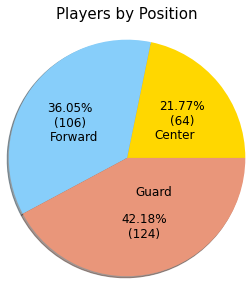

In [16]:
def num_of_plyers(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

ply_labels = ["Center", "Forward", "Guard"]
ply_vals = [len(center), len(forward), len(guard)]
total = ss['Player'].count()

plt.pie(ply_vals, labels=ply_labels, labeldistance= 0.30, radius=1.5, textprops={'fontsize': 12},
        colors=['gold','lightskyblue','darksalmon'], autopct=num_of_plyers, pctdistance=0.60, shadow=True)

plt.suptitle("Players by Position", size=15)

plt.tight_layout()
plt.show()

### Attempts by Position

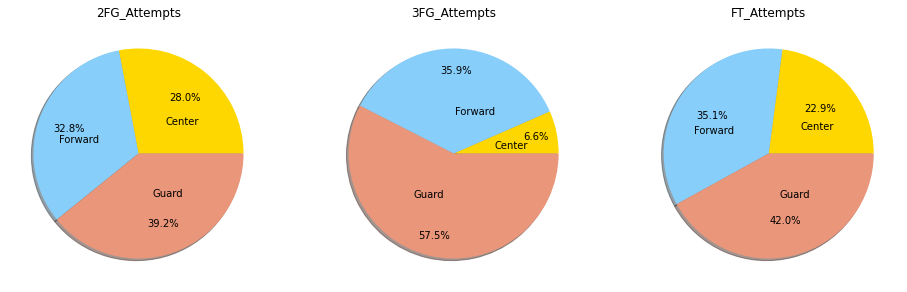

In [17]:
fig = plt.figure(figsize=(16,8))

size1 = ss.groupby("Position")["2FG_Attempts"].sum().values
size2 = ss.groupby("Position")["3FG_Attempts"].sum().values
size3 = ss.groupby("Position")["FT_Attempts"].sum().values

ply_labels = ss.groupby("Position").count().index

# 2FG_Attempts
plt.subplot(1,3,1)
plt.pie(size1, labels=ply_labels, labeldistance= 0.40, radius=1, textprops={'fontsize': 10},
        colors=['gold','lightskyblue','darksalmon'], autopct='%0.1f%%', pctdistance=0.70, shadow=True)
plt.title('2FG_Attempts')

# 3FG_Attempts
plt.subplot(1,3,2)
plt.pie(size2, labels=ply_labels, labeldistance= 0.40, radius=1, textprops={'fontsize': 10},
        colors=['gold','lightskyblue','darksalmon'], autopct='%0.1f%%', pctdistance=0.80, shadow=True)
plt.title('3FG_Attempts')

# FT_Attempts
plt.subplot(1,3,3)
plt.pie(size3, labels=ply_labels, labeldistance= 0.40, radius=1, textprops={'fontsize': 10},
        colors=['gold','lightskyblue','darksalmon'], autopct='%0.1f%%', pctdistance=0.65, shadow=True)
plt.title('FT_Attempts')

plt.show()

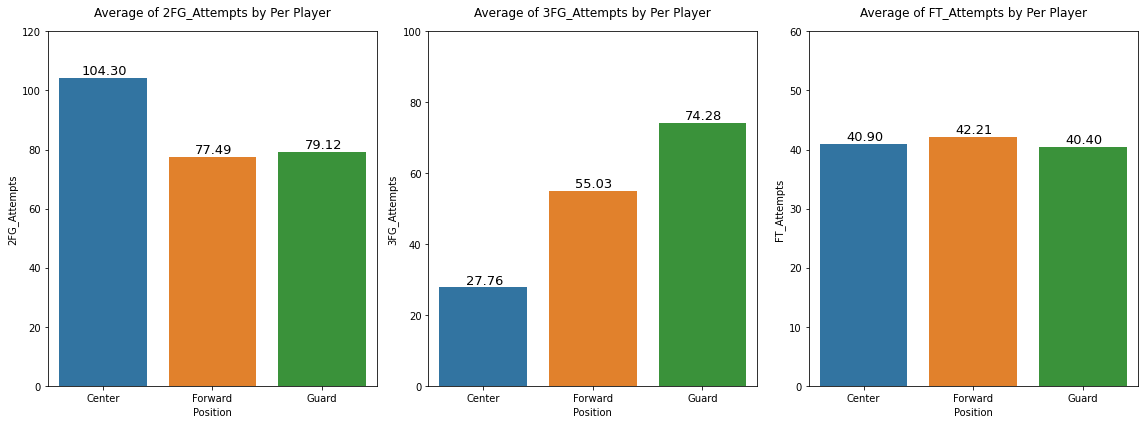

In [18]:
fig, ax = plt.subplots(1,3, figsize=(16,6))

order=["Center", "Forward", "Guard"]

sns.barplot(x="Position", y="2FG_Attempts", data=ss[ss['2FG_Attempts'] != 0], ax = ax[0], order=order, ci=None)
sns.barplot(x="Position", y="3FG_Attempts", data=ss[ss['3FG_Attempts'] != 0], ax = ax[1], order=order, ci=None)
sns.barplot(x="Position", y="FT_Attempts", data=ss[ss['FT_Attempts'] != 0], ax = ax[2], order=order, ci=None)

for i in range(len(order)):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average of 2FG_Attempts by Per Player', pad=15)
ax[1].set_title('Average of 3FG_Attempts by Per Player', pad=15)
ax[2].set_title('Average of FT_Attempts by Per Player', pad=15)

ax[0].set_ylim(0,120), ax[1].set_ylim(0,100), ax[2].set_ylim(0,60)
fig.tight_layout();

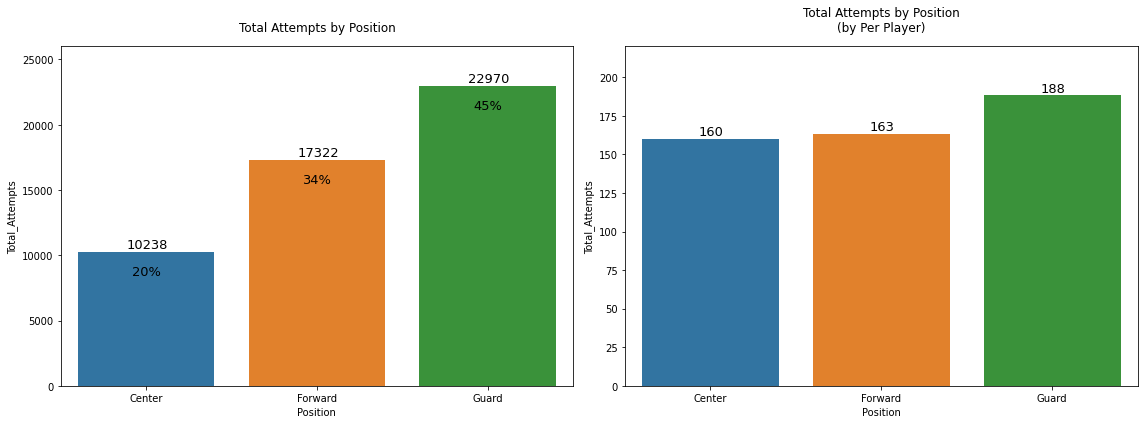

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

order=["Center", "Forward", "Guard"]

sns.barplot(x="Position", y="Total_Attempts", data=ss, ax = ax[0], order=order, estimator=np.sum, ci=None)
sns.barplot(x="Position", y="Total_Attempts", data=ss[ss['Total_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
for bar in ax[0].patches:
            ax[0].text(bar.get_x() + bar.get_width()/2.,bar.get_height()-2000,
                       f'{bar.get_height()/ss.Total_Attempts.sum():.0%}',  fontsize=13,ha="center",va="bottom")

ax[0].set_title('Total Attempts by Position', pad=15)
ax[1].set_title('Total Attempts by Position\n(by Per Player)', pad=15)

ax[0].set_ylim(0,26000), ax[1].set_ylim(0,220)
fig.tight_layout();

#### <span style="color:purple">players who took too little time in a group might have lowered the values ? So let's check for outliers

In [20]:
ss[['Min']].describe().T

,count,mean,std,min,25%,50%,75%,max
Min,294.0,450.5,305.773386,2.0,168.5,471.0,700.75,1200.0


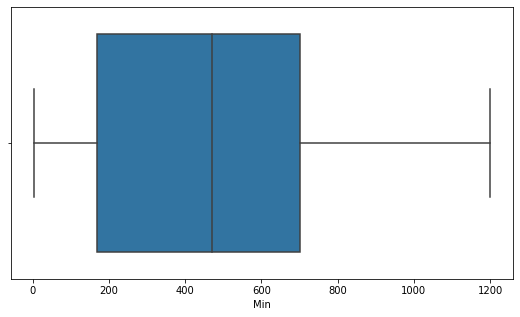

In [21]:
plt.figure(figsize=(9,5))
sns.boxplot(x='Min',data=ss);

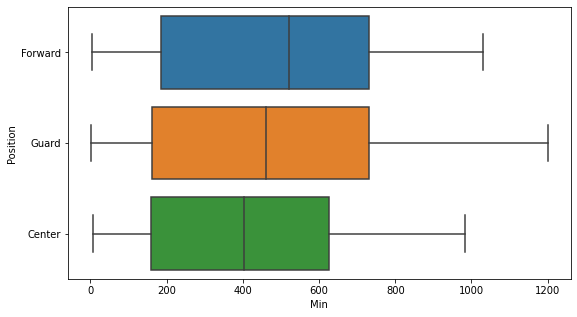

In [22]:
plt.figure(figsize=(9,5))
sns.boxplot(x='Min',y='Position', data=ss);

#### <span style="color:purple">there is no outlier when minutes calculated for each position

<hr style="border:2px solid black"> </hr>

## 2FG Statistics

### relationships / correlations

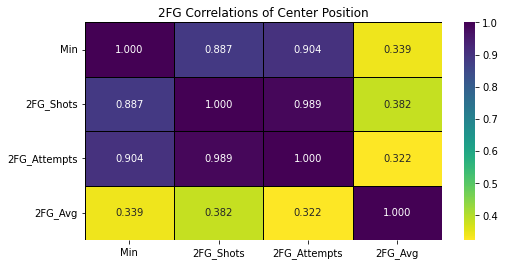

In [23]:
plt.figure(figsize=(8,4))
sns.heatmap(data=center[['Min', '2FG_Shots', '2FG_Attempts', '2FG_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='viridis_r', linewidth=1, linecolor='black')

plt.title('2FG Correlations of Center Position');

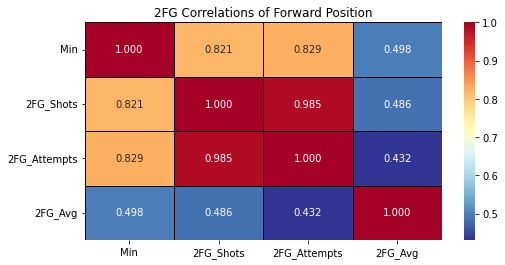

In [24]:
plt.figure(figsize=(8,4))
sns.heatmap(data=forward[['Min', '2FG_Shots', '2FG_Attempts', '2FG_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='RdYlBu_r', linewidth=1, linecolor='black')

plt.title('2FG Correlations of Forward Position');

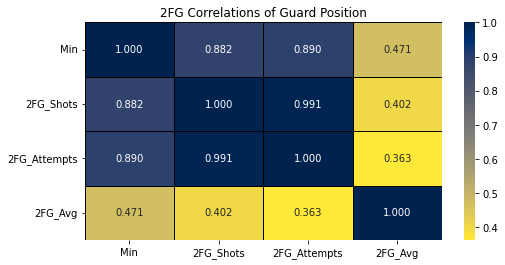

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(data=guard[['Min', '2FG_Shots', '2FG_Attempts', '2FG_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='cividis_r', linewidth=1, linecolor='black')

plt.title('2FG Correlations of Guard Position');

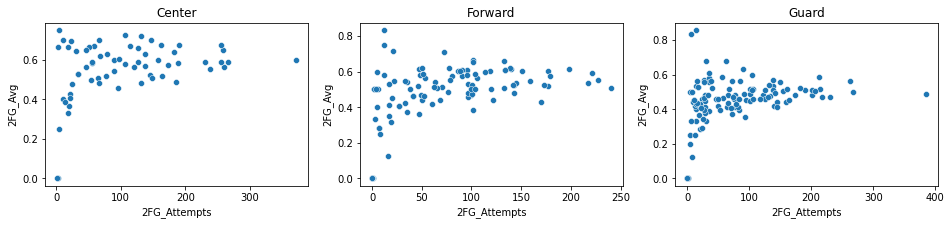

In [26]:
fig = plt.figure(figsize=(16,3))
count = 1

for pos in ss.groupby('Position').size().index:
    plt.subplot(1,3,count)
    sns.scatterplot(ss[ss['Position'] == pos]['2FG_Attempts'], ss[ss['Position'] == pos]['2FG_Avg'])
    plt.title(pos)
    count += 1
    
plt.show()

### Distribution of 2FG Attempts and Success Rates for Each Position

#### <span style="color:purple"> total number of 2FG Attempts

In [27]:
ss['2FG_Attempts'].sum()

23837

#### <span style="color:purple"> total number of 0 Attempts for each group

In [28]:
ss[ss['2FG_Attempts'] == 0].groupby('Position')[['Position']].count()

,Position
Position,
Forward,5
Guard,6


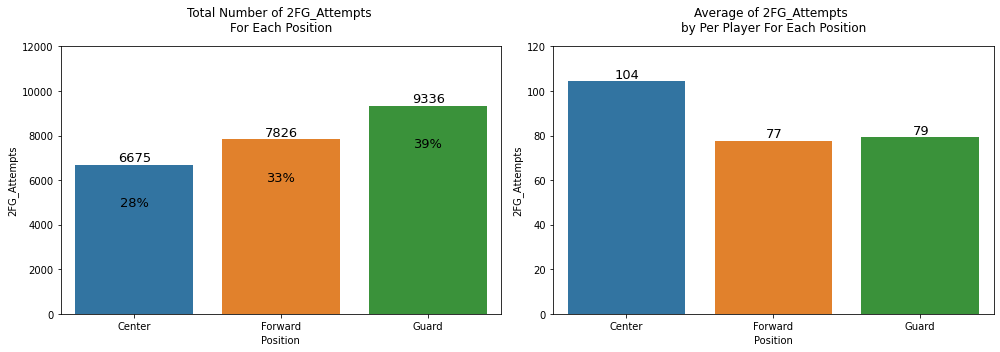

In [29]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=["Center", "Forward", "Guard"]

sns.barplot(x="Position", y="2FG_Attempts", data=ss, ax = ax[0], estimator=np.sum, order=order, ci=None)
sns.barplot(x="Position", y="2FG_Attempts", data=ss[ss['2FG_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
         
for bar in ax[0].patches:
           ax[0].text(bar.get_x() + bar.get_width()/2.,bar.get_height()-2000,
                      f"{bar.get_height()/ss['2FG_Attempts'].sum():.0%}",  fontsize=13,ha="center",va="bottom")
        
ax[0].set_title('Total Number of 2FG_Attempts \nFor Each Position', pad=15)
ax[1].set_title('Average of 2FG_Attempts \nby Per Player For Each Position', pad=15)

ax[0].set_ylim(0,12000), ax[1].set_ylim(0,120)
fig.tight_layout();

#### <span style="color:purple"> calculating of success rate of each group (not by player)

In [30]:
ss.groupby('Position')['2FG_Shots'].sum() / ss.groupby('Position')['2FG_Attempts'].sum()

Position
Center     0.592959
Forward    0.542806
Guard      0.488967
dtype: float64

In [31]:
size1 = list(ss.groupby("Position")["2FG_Shots"].sum() / ss.groupby("Position")["2FG_Attempts"].sum())

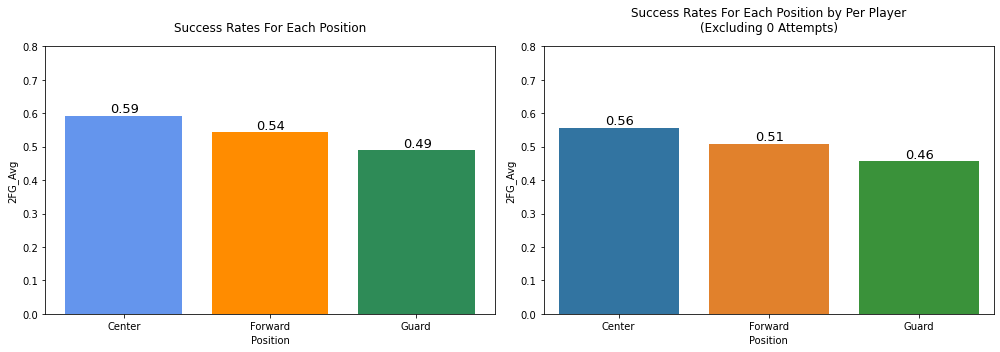

In [32]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=["Center", "Forward", "Guard"]

ax[0].bar(order, size1, color=['cornflowerblue', 'darkorange', 'seagreen'])
sns.barplot(x="Position", y="2FG_Avg", data=ss[ss['2FG_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Success Rates For Each Position', pad=15)        
ax[1].set_title('Success Rates For Each Position by Per Player\n(Excluding 0 Attempts)', pad=15)        

ax[0].set_ylim(0,0.8), ax[1].set_ylim(0,0.8)
ax[0].set_ylabel("2FG_Avg")
ax[0].set_xlabel("Position")
fig.tight_layout();

<hr style="border:2px solid black"> </hr>

## 3FG Statistics

### relationships / correlations

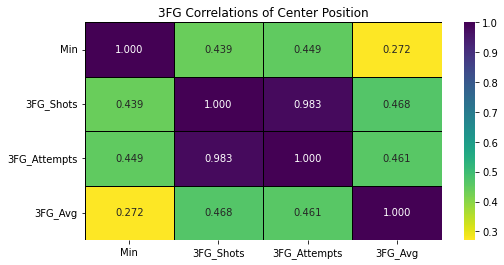

In [33]:
plt.figure(figsize=(8,4))
sns.heatmap(data=center[['Min', '3FG_Shots', '3FG_Attempts', '3FG_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='viridis_r', linewidth=1, linecolor='black')

plt.title('3FG Correlations of Center Position');

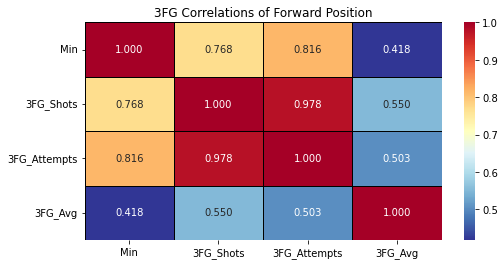

In [34]:
plt.figure(figsize=(8,4))
sns.heatmap(data=forward[['Min', '3FG_Shots', '3FG_Attempts', '3FG_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='RdYlBu_r', linewidth=1, linecolor='black')

plt.title('3FG Correlations of Forward Position');

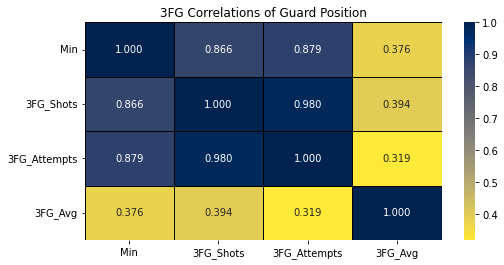

In [35]:
plt.figure(figsize=(8,4))
sns.heatmap(data=guard[['Min', '3FG_Shots', '3FG_Attempts', '3FG_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='cividis_r', linewidth=1, linecolor='black')

plt.title('3FG Correlations of Guard Position');

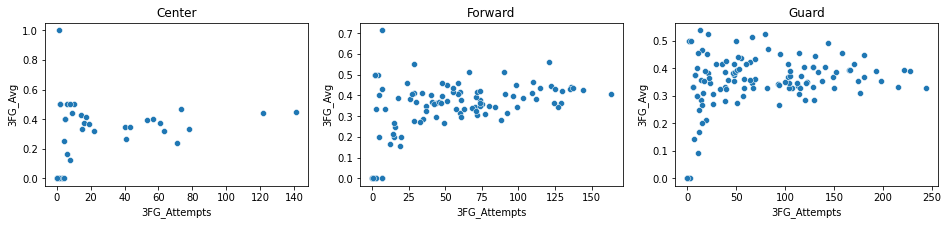

In [36]:
fig = plt.figure(figsize=(16,3))
count = 1

for pos in ss.groupby('Position').size().index:
    plt.subplot(1,3,count)
    sns.scatterplot(ss[ss['Position'] == pos]['3FG_Attempts'], ss[ss['Position'] == pos]['3FG_Avg'])
    plt.title(pos)
    count += 1
    
plt.show()

### Distribution of 3FG Attempts and Success Rates for Each Position

#### <span style="color:purple"> total number of 3FG Attempts

In [37]:
ss['3FG_Attempts'].sum()

15628

#### <span style="color:purple"> total number of 0 Attempts for each group

In [38]:
ss[ss['3FG_Attempts'] == 0].groupby('Position')[['Position']].count()

,Position
Position,
Center,27
Forward,4
Guard,3


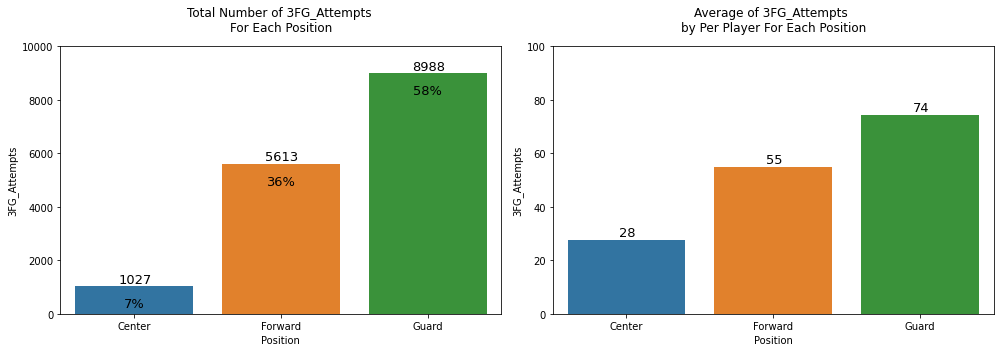

In [39]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=["Center", "Forward", "Guard"]

sns.barplot(x="Position", y="3FG_Attempts", data=ss, ax = ax[0], estimator=np.sum, order=order, ci=None)
sns.barplot(x="Position", y="3FG_Attempts", data=ss[ss['3FG_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
         
for bar in ax[0].patches:
           ax[0].text(bar.get_x() + bar.get_width()/2.,bar.get_height()-900,
                      f"{bar.get_height()/ss['3FG_Attempts'].sum():.0%}",  fontsize=13,ha="center",va="bottom")
        
ax[0].set_title('Total Number of 3FG_Attempts \nFor Each Position', pad=15)
ax[1].set_title('Average of 3FG_Attempts \nby Per Player For Each Position', pad=15)

ax[0].set_ylim(0,10000), ax[1].set_ylim(0,100)
fig.tight_layout();

#### <span style="color:purple"> calculating of success rate of each group (not by player)

In [40]:
ss.groupby('Position')['3FG_Shots'].sum() / ss.groupby('Position')['3FG_Attempts'].sum()

Position
Center     0.374878
Forward    0.387137
Guard      0.373164
dtype: float64

In [41]:
size2 = list(ss.groupby("Position")["3FG_Shots"].sum() / ss.groupby("Position")["3FG_Attempts"].sum())

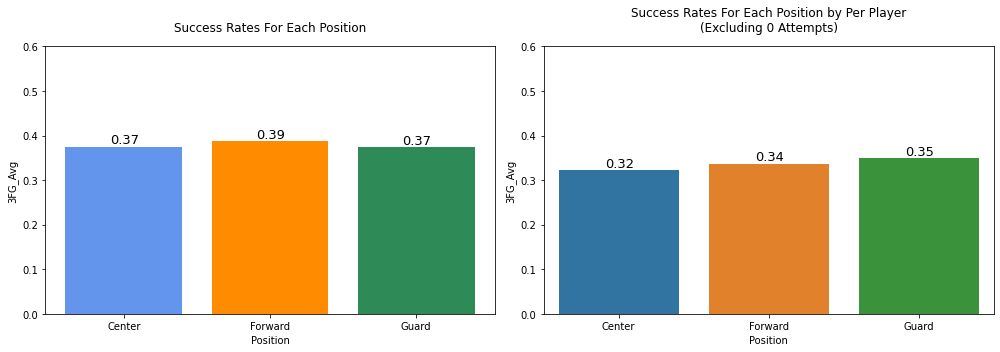

In [42]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=["Center", "Forward", "Guard"]

ax[0].bar(order, size2, color=['cornflowerblue', 'darkorange', 'seagreen'])
sns.barplot(x="Position", y="3FG_Avg", data=ss[ss['3FG_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Success Rates For Each Position', pad=15)        
ax[1].set_title('Success Rates For Each Position by Per Player\n(Excluding 0 Attempts)', pad=15)        

ax[0].set_ylim(0,0.6), ax[1].set_ylim(0,0.6)
ax[0].set_ylabel("3FG_Avg")
ax[0].set_xlabel("Position")
fig.tight_layout();

<hr style="border:2px solid black"> </hr>

## FT Statistics

### relationships / correlations

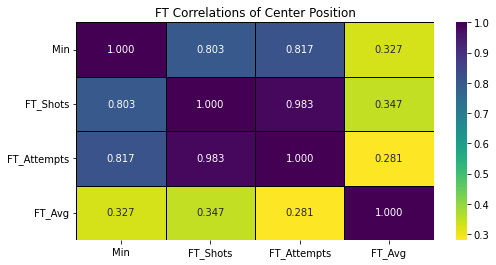

In [43]:
plt.figure(figsize=(8,4))
sns.heatmap(data=center[['Min', 'FT_Shots', 'FT_Attempts', 'FT_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='viridis_r', linewidth=1, linecolor='black')

plt.yticks(rotation=0) 
plt.title('FT Correlations of Center Position');

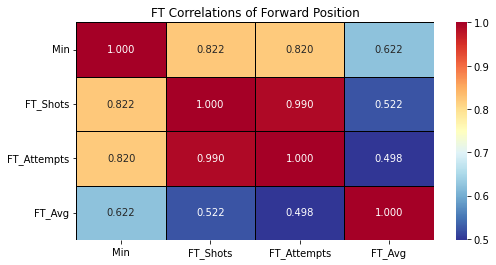

In [44]:
plt.figure(figsize=(8,4))
sns.heatmap(data=forward[['Min', 'FT_Shots', 'FT_Attempts', 'FT_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='RdYlBu_r', linewidth=1, linecolor='black')

plt.yticks(rotation=0) 
plt.title('FT Correlations of Forward Position');

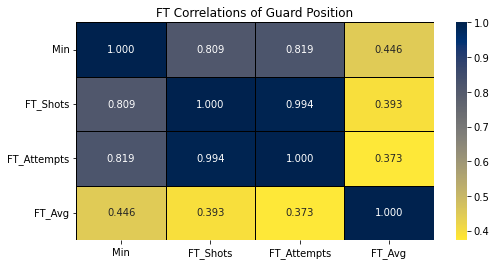

In [45]:
plt.figure(figsize=(8,4))
sns.heatmap(data=guard[['Min', 'FT_Shots', 'FT_Attempts', 'FT_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='cividis_r', linewidth=1, linecolor='black')

plt.yticks(rotation=0) 
plt.title('FT Correlations of Guard Position');

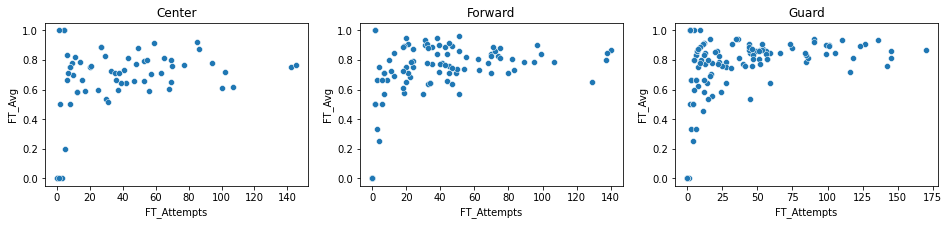

In [46]:
fig = plt.figure(figsize=(16,3))
count = 1

for pos in ss.groupby('Position').size().index:
    plt.subplot(1,3,count)
    sns.scatterplot(ss[ss['Position'] == pos]['FT_Attempts'], ss[ss['Position'] == pos]['FT_Avg'])
    plt.title(pos)
    count += 1
    
plt.show()

### Distribution of FT Attempts and Success Rates for Each Position

#### <span style="color:purple"> total number of FT Attempts

In [47]:
ss['FT_Attempts'].sum()

11065

#### <span style="color:purple"> total number of 0 Attempts for each group

In [48]:
ss[ss['FT_Attempts'] == 0].groupby('Position')[['Position']].count()

,Position
Position,
Center,2
Forward,14
Guard,9


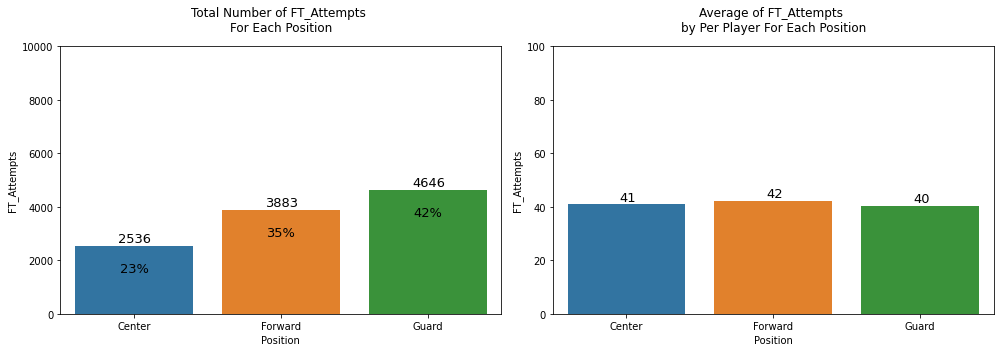

In [49]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=["Center", "Forward", "Guard"]

sns.barplot(x="Position", y="FT_Attempts", data=ss, ax = ax[0], estimator=np.sum, order=order, ci=None)
sns.barplot(x="Position", y="FT_Attempts", data=ss[ss['FT_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
         
for bar in ax[0].patches:
           ax[0].text(bar.get_x() + bar.get_width()/2.,bar.get_height()-1100,
                      f"{bar.get_height()/ss['FT_Attempts'].sum():.0%}",  fontsize=13,ha="center",va="bottom")
        
ax[0].set_title('Total Number of FT_Attempts \nFor Each Position', pad=15)
ax[1].set_title('Average of FT_Attempts \nby Per Player For Each Position', pad=15)

ax[0].set_ylim(0,10000), ax[1].set_ylim(0,100)
fig.tight_layout();

#### <span style="color:purple"> calculating of success rate of each group (not by player)

In [50]:
ss.groupby('Position')['FT_Shots'].sum() / ss.groupby('Position')['FT_Attempts'].sum()

Position
Center     0.730284
Forward    0.790368
Guard      0.832975
dtype: float64

In [51]:
size3 = list(ss.groupby("Position")["FT_Shots"].sum() / ss.groupby("Position")["FT_Attempts"].sum())

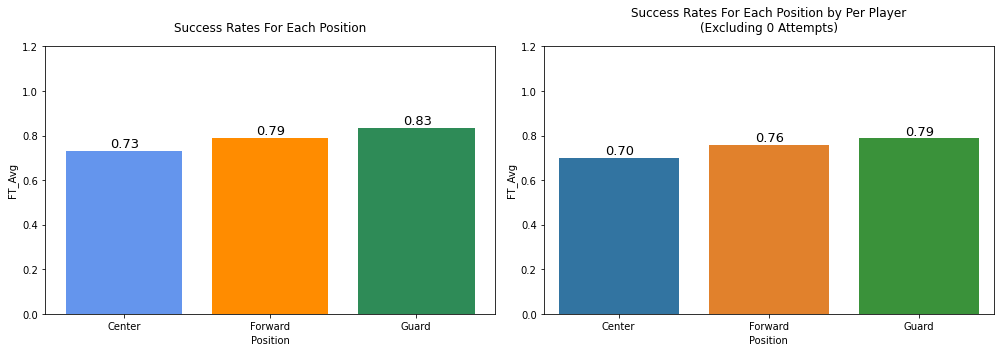

In [52]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=["Center", "Forward", "Guard"]

ax[0].bar(order, size3, color=['cornflowerblue', 'darkorange', 'seagreen'])
sns.barplot(x="Position", y="FT_Avg", data=ss[ss['FT_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Success Rates For Each Position', pad=15)        
ax[1].set_title('Success Rates For Each Position by Per Player\n(Excluding 0 Attempts)', pad=15)        

ax[0].set_ylim(0,1.2), ax[1].set_ylim(0,1.2)
ax[0].set_ylabel("FT_Avg")
ax[0].set_xlabel("Position")
fig.tight_layout();

<hr style="border:2px solid black"> </hr>

## Total Shooting Statistics

### relationships / correlations

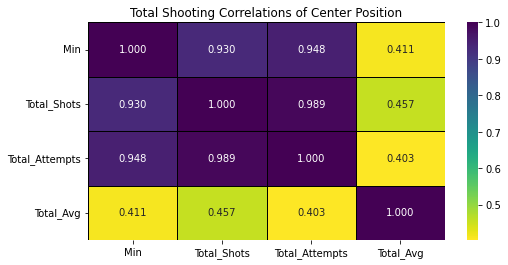

In [53]:
plt.figure(figsize=(8,4))
sns.heatmap(data=center[['Min', 'Total_Shots', 'Total_Attempts', 'Total_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='viridis_r', linewidth=1, linecolor='black')

plt.title('Total Shooting Correlations of Center Position');

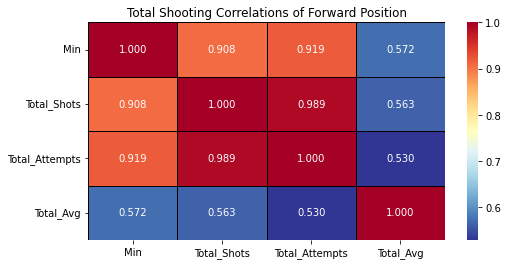

In [54]:
plt.figure(figsize=(8,4))
sns.heatmap(data=forward[['Min', 'Total_Shots', 'Total_Attempts', 'Total_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='RdYlBu_r', linewidth=1, linecolor='black')

plt.title('Total Shooting Correlations of Forward Position');

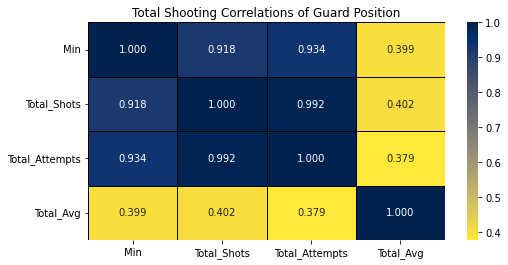

In [55]:
plt.figure(figsize=(8,4))
sns.heatmap(data=guard[['Min', 'Total_Shots', 'Total_Attempts', 'Total_Avg']].corr(), 
            annot=True, fmt='.3f', cmap='cividis_r', linewidth=1, linecolor='black')

plt.title('Total Shooting Correlations of Guard Position');

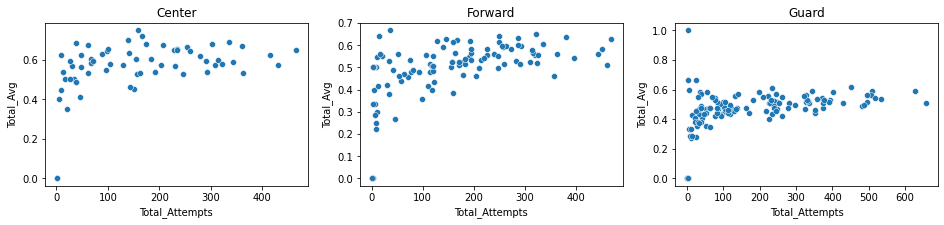

In [56]:
fig = plt.figure(figsize=(16,3))
count = 1

for pos in ss.groupby('Position').size().index:
    plt.subplot(1,3,count)
    sns.scatterplot(ss[ss['Position'] == pos]['Total_Attempts'], ss[ss['Position'] == pos]['Total_Avg'])
    plt.title(pos)
    count += 1
    
plt.show()

***

### Distribution of Total Attempts and Success Rates for Each Position

#### <span style="color:purple"> total number of Total Attempts

In [57]:
ss['Total_Attempts'].sum()

50530

#### <span style="color:purple"> total number of 0 Attempts for each group

In [58]:
ss[ss['Total_Attempts'] == 0].groupby('Position')[['Position']].count()

,Position
Position,
Guard,2


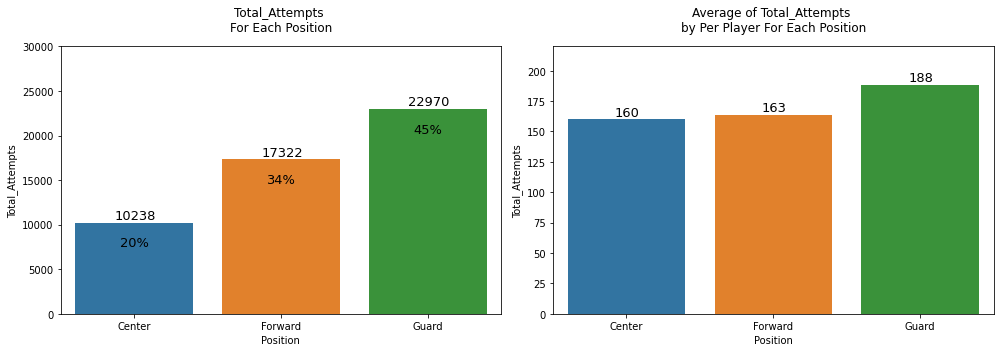

In [59]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=["Center", "Forward", "Guard"]

sns.barplot(x="Position", y="Total_Attempts", data=ss, ax = ax[0], estimator=np.sum, order=order, ci=None)
sns.barplot(x="Position", y="Total_Attempts", data=ss[ss['Total_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
         
for bar in ax[0].patches:
           ax[0].text(bar.get_x() + bar.get_width()/2.,bar.get_height()-3000,
                      f"{bar.get_height()/ss['Total_Attempts'].sum():.0%}",  fontsize=13,ha="center",va="bottom")
        
ax[0].set_title('Total_Attempts \nFor Each Position', pad=15)
ax[1].set_title('Average of Total_Attempts \nby Per Player For Each Position', pad=15)

ax[0].set_ylim(0,30000), ax[1].set_ylim(0,220)
fig.tight_layout();

#### <span style="color:purple"> calculating of success rate of each group (not by player)

In [60]:
ss.groupby('Position')['Total_Shots'].sum() / ss.groupby('Position')['Total_Attempts'].sum()

Position
Center     0.605099
Forward    0.547858
Guard      0.513235
dtype: float64

In [61]:
size4 = list(ss.groupby("Position")["Total_Shots"].sum() / ss.groupby("Position")["Total_Attempts"].sum())

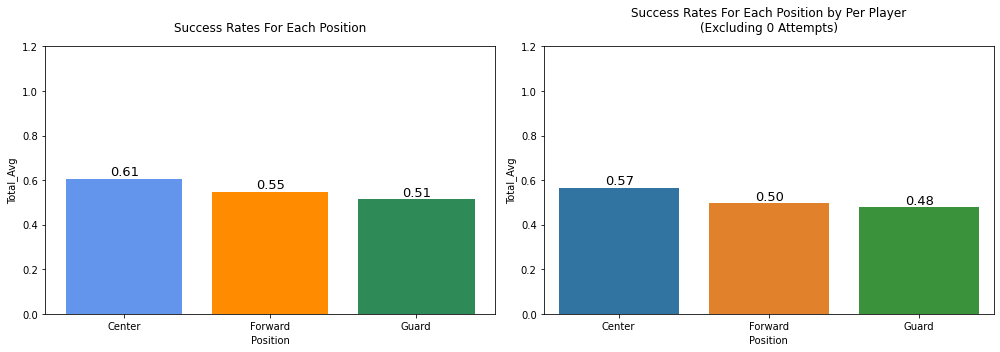

In [62]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=["Center", "Forward", "Guard"]

ax[0].bar(order, size4, color=['cornflowerblue', 'darkorange', 'seagreen'])
sns.barplot(x="Position", y="Total_Avg", data=ss[ss['Total_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Success Rates For Each Position', pad=15)        
ax[1].set_title('Success Rates For Each Position by Per Player\n(Excluding 0 Attempts)', pad=15)        

ax[0].set_ylim(0,1.2), ax[1].set_ylim(0,1.2)
ax[0].set_ylabel("Total_Avg")
ax[0].set_xlabel("Position")
fig.tight_layout();